## Tumorklassifikation mit ML & Deep Learning

### Ziel
Automatische Erkennung von Hirntumoren auf MRT-Bildern mit klassischen ML-Algorithmen und CNNs / MobileNetV2.

### Daten
Datensatz: [Brain MRI Images for Brain Tumor Detection](https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection)

- 2 Klassen: Tumor / Kein Tumor
- 300 Bilder pro Klasse

### Modelle
- Logistic Regression
- Random Forest
- SVM
- CNN
- MobileNetV2 (Transfer Learning)

### Ergebnisse

| Modell             | Test Accuracy |
|--------------------|---------------|
| Logistic Regression | 0.85          |
| CNN                 | 0.87          |
| MobileNetV2         | 0.92 ‚úÖ       |

### Learnings
- CNNs k√∂nnen einfache Bilddaten gut klassifizieren, unterscheiden sich jedoch nicht 
zu den klassischen Machine Learning Algorithmen (LR, SVM, RF)
- Transfer Learning ist sehr effizient bei kleinen Datens√§tzen


## Imports

In [34]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

## Laden der MRT-Bilder

In [35]:
data_dir = "data"
categories = ["no", "yes"]
img_size = 128

X, y = [], []

for label, category in enumerate(categories):
    folder = os.path.join(data_dir, category)
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (img_size, img_size))
            X.append(img.flatten())  # Bild als Vektor
            y.append(label)

X = np.array(X)
y = np.array(y)
print("Bilder geladen:", X.shape)
print("Bilder geladen:", y.shape)


Bilder geladen: (253, 16384)
Bilder geladen: (253,)


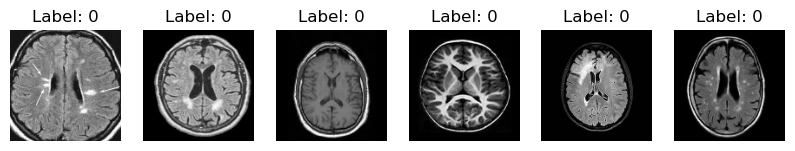

In [36]:
plt.figure(figsize=(10, 3))
for i in range(6):
    plt.subplot(1, 6, i + 1)
    plt.imshow(X[i].reshape(img_size, img_size), cmap="gray")
    plt.title(f"Label: {y[i]}")
    plt.axis("off")
plt.show()


## üßÆ Anwendung der klassischen ML-Algorithmen

Im Folgenden werden drei klassische Machine-Learning-Algorithmen auf den Datensatz angewendet:

- **Logistic Regression**
- **Random Forest**
- **Support Vector Machine (SVM)**

Diese Modelle ben√∂tigen **keine tiefen neuronalen Netze** und arbeiten auf **flach vektorisierten Bilddaten**. Sie dienen als **Baseline-Vergleich** zu den sp√§ter eingesetzten Deep-Learning-Ans√§tzen wie CNN und MobileNetV2.

---

### ‚úÖ Logistic Regression

Die **Logistische Regression** ist ein lineares Modell, das f√ºr bin√§re Klassifikationen wie ‚ÄûTumor vorhanden‚Äú oder ‚Äûkein Tumor‚Äú gut geeignet ist.  
Sie berechnet Wahrscheinlichkeiten und entscheidet anhand eines Schwellwerts (meist 0.5), welcher Klasse ein Beispiel zugeordnet wird.

- Vorteil: Schnell trainiert, leicht interpretierbar
- Nachteil: Funktioniert nur gut, wenn die Klassen **linear trennbar** sind

---

### üå≤ Random Forest

Der **Random Forest** ist ein Ensemble-Modell, das viele Entscheidungsb√§ume trainiert und deren Vorhersagen kombiniert.  
Er ist besonders robust gegen√ºber Overfitting und kann komplexe Entscheidungsgrenzen modellieren.

- Vorteil: Gute Performance bei vielen Features
- Nachteil: Weniger transparent, langsamer bei gro√üen Datens√§tzen

---

### üß≠ Support Vector Machine (SVM)

Die **Support Vector Machine** sucht die optimale Trennlinie (bzw. -fl√§che), die die Klassen mit maximalem Abstand voneinander trennt.  
Durch sogenannte **Kernels** kann die SVM auch nicht-lineare Trennungen abbilden.

- Vorteil: Gute Genauigkeit bei kleinen bis mittleren Datens√§tzen
- Nachteil: Rechenintensiv bei gro√üen Datens√§tzen

---

Nach der Anwendung dieser Modelle werden die Ergebnisse in Bezug auf **Testgenauigkeit (Accuracy)** verglichen und in einer Tabelle dargestellt.


In [39]:
# Daten splitten
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Modelle definieren
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Ergebnisse speichern
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"üìä {name} - Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    results.append((name, acc))


üìä Logistic Regression - Accuracy: 0.7969
              precision    recall  f1-score   support

           0       0.75      0.72      0.73        25
           1       0.82      0.85      0.84        39

    accuracy                           0.80        64
   macro avg       0.79      0.78      0.79        64
weighted avg       0.80      0.80      0.80        64

üìä Random Forest - Accuracy: 0.7969
              precision    recall  f1-score   support

           0       0.88      0.56      0.68        25
           1       0.77      0.95      0.85        39

    accuracy                           0.80        64
   macro avg       0.82      0.75      0.77        64
weighted avg       0.81      0.80      0.79        64

üìä SVM - Accuracy: 0.7812
              precision    recall  f1-score   support

           0       0.82      0.56      0.67        25
           1       0.77      0.92      0.84        39

    accuracy                           0.78        64
   macro avg      

In [16]:
import pandas as pd

df_results = pd.DataFrame(results, columns=["Modell", "Accuracy"])
df_results = df_results.sort_values(by="Accuracy", ascending=False)
print(df_results)


                Modell  Accuracy
1        Random Forest  0.812500
0  Logistic Regression  0.796875
2                  SVM  0.781250


In [17]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [18]:
data_dir = "data"
categories = ["no", "yes"]
img_size = 128

X = []
y = []

for label, category in enumerate(categories):
    path = os.path.join(data_dir, category)
    for file in os.listdir(path):
        img_path = os.path.join(path, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (img_size, img_size))
            X.append(img)
            y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 1) / 255.0  # normalisieren
y = np.array(y)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


In [20]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # bin√§re Klassifikation
])


/opt/anaconda3/envs/AIA/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 121ms/step - accuracy: 0.5502 - loss: 0.9201 - val_accuracy: 0.7344 - val_loss: 0.5462
Epoch 2/10
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 106ms/step - accuracy: 0.7745 - loss: 0.5353 - val_accuracy: 0.7969 - val_loss: 0.5608
Epoch 3/10
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 114ms/step - accuracy: 0.8479 - loss: 0.4844 - val_accuracy: 0.7969 - val_loss: 0.5593
Epoch 4/10
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 107ms/step - accuracy: 0.8024 - loss: 0.4560 - val_accuracy: 0.8281 - val_loss: 0.5525
Epoch 5/10
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 106ms/step - accuracy: 0.8332 - loss: 0.3507 - val_accuracy: 0.8125 - val_loss: 0.6265
Epoch 6/10
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 108ms/step - accuracy: 0.8654 - loss: 0.2625 - val_accuracy: 0.7969 - val_loss: 0.5905
Epoc

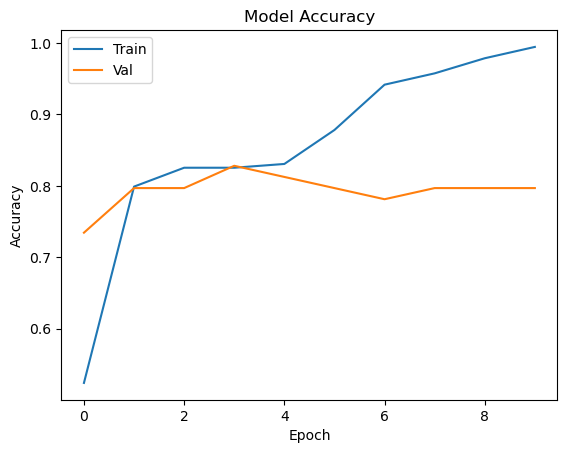

In [22]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [23]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"‚úÖ Testgenauigkeit: {test_acc:.4f}")


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 43ms/step - accuracy: 0.7708 - loss: 0.9525
‚úÖ Testgenauigkeit: 0.7969


In [24]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

data_dir = "data"
categories = ["no", "yes"]
img_size = 224  # Mobilenet braucht 224x224

X, y = [], []

for label, category in enumerate(categories):
    path = os.path.join(data_dir, category)
    for file in os.listdir(path):
        img_path = os.path.join(path, file)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (img_size, img_size))
            X.append(img)
            y.append(label)

X = np.array(X) / 255.0
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models

base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,  # Wir bauen unseren eigenen Klassifikator
    weights='imagenet'
)
base_model.trainable = False  # Erstmal einfrieren


In [26]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Bin√§re Klassifikation
])


In [27]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))


Epoch 1/10
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 429ms/step - accuracy: 0.6386 - loss: 0.6554 - val_accuracy: 0.8438 - val_loss: 0.4176
Epoch 2/10
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 314ms/step - accuracy: 0.7705 - loss: 0.4734 - val_accuracy: 0.8750 - val_loss: 0.3297
Epoch 3/10
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 315ms/step - accuracy: 0.8590 - loss: 0.3259 - val_accuracy: 0.9219 - val_loss: 0.2588
Epoch 4/10
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 285ms/step - accuracy: 0.9288 - loss: 0.2488 - val_accuracy: 0.9219 - val_loss: 0.2514
Epoch 5/10
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 288ms/step - accuracy: 0.9198 - loss: 0.2266 - val_accuracy: 0.9375 - val_loss: 0.2100
Epoch 6/10
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 285ms/step - accuracy: 0.9501 - loss: 0.1857 - val_accuracy: 0.9062 - val_loss: 0.2053
Epoc

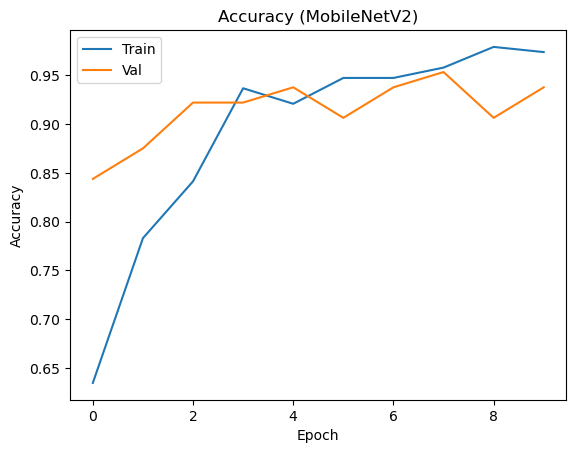

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy (MobileNetV2)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [29]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"‚úÖ Testgenauigkeit: {test_acc:.4f}")


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 223ms/step - accuracy: 0.9375 - loss: 0.1616
‚úÖ Testgenauigkeit: 0.9375
